In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

# Jiang: DeGroot vs RL vs WM/PE

In [2]:
human = pd.read_pickle("data/jiang.pkl")
observations = human.query("sid==1 & trial==1")['color'].to_numpy()
times = np.arange(1, len(observations)+1)

In [3]:
observations

array([ 1, -1, -1,  1, -1,  1, -1, -1, -1, -1])

In [4]:
def mean_history(obs):
    output = []
    for o in range(len(obs)):
        output.append(np.mean(obs[:o+1]))
    return output

In [5]:
def cumulative_average(obs):
    output = []
    ca = 0
    for o in range(len(obs)):
        ca = (obs[o] + o*ca) / (o+1)
        output.append(ca)
    return output

In [6]:
def weighted_error(obs):
    output = []
    value = 0
    for o in range(len(obs)):
        weight = 1/(o+1)
        error = obs[o] - value
        value += weight * error
        output.append(value)
    return output

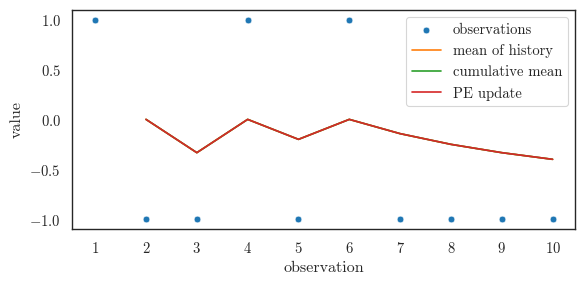

In [13]:
mh = mean_history(observations)
ca = cumulative_average(observations)
we = weighted_error(observations)
fig, ax = plt.subplots(figsize=(6, 3))
sns.scatterplot(x=times, y=observations, label='observations', color=palette[0])
sns.lineplot(x=times[1:], y=mh[1:], label='mean of history', color=palette[1])
sns.lineplot(x=times[1:], y=ca[1:], label='cumulative mean', color=palette[2])
sns.lineplot(x=times[1:], y=we[1:], label='PE update', color=palette[3])
ax.set(xlabel='observation', ylabel='value', xticks=times)
plt.tight_layout()
fig.savefig("plots/pure_math_comparison.jpg", dpi=100)

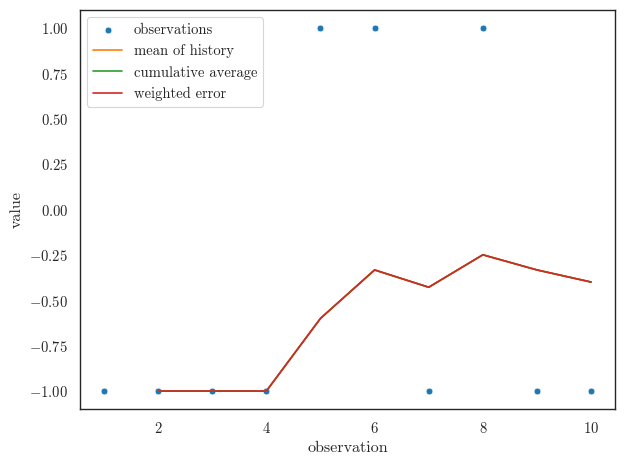

In [22]:
np.random.RandomState(seed=0).shuffle(observations)
mh = mean_history(observations)
ca = cumulative_average(observations)
we = weighted_error(observations)
fig, ax = plt.subplots()
sns.scatterplot(x=times, y=observations, label='observations', color=palette[0])
sns.lineplot(x=times[1:], y=mh[1:], label='mean of history', color=palette[1])
sns.lineplot(x=times[1:], y=ca[1:], label='cumulative average', color=palette[2])
sns.lineplot(x=times[1:], y=we[1:], label='weighted error', color=palette[3])
ax.set(xlabel='observation', ylabel='value')
plt.tight_layout()

# Carrabin: Bayes vs Bayes/PE vs WM/PE

In [3]:
human = pd.read_pickle("data/carrabin.pkl")
observations = human.query("sid==1 & trial==1")['color'].to_numpy()
times = np.arange(1, len(observations)+1)

In [4]:
observations

array([ 1, -1, -1, -1, -1])

In [15]:
def bayes(obs):
    output = []
    for o in range(len(obs)+1):
        reds = len(np.where(obs[:o]==1)[0])
        p_star = (reds+1)/(o+2)
        expectation = 2*p_star-1
        output.append(np.around(expectation, 4))
        # print(o, obs[:o], reds, p_star, expectation)
    return np.array(output)

In [16]:
def bayesPE(obs):
    p_star = 0.5
    output = [2*p_star-1]
    for o in range(len(obs)):
        delta = (1-p_star)/(o+3) if obs[o]==1 else -p_star/(o+3)
        p_star += delta
        expectation = 2*p_star-1
        output.append(np.around(expectation, 4))
    return np.array(output)

In [17]:
def weightPE(obs):
    expectation = 0
    output = [expectation]
    for o in range(len(obs)):
        weight = 1/(o+3)
        error = obs[o] - expectation
        expectation += weight * error
        output.append(np.around(expectation, 4))
    return np.array(output)

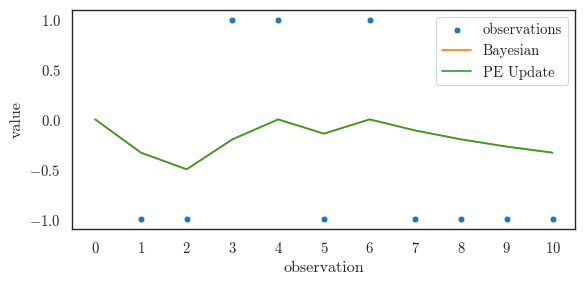

In [20]:
observations = human.query("sid==1 & trial==3")['color'].to_numpy()
times = np.arange(0, len(observations)+1)
B = bayes(observations)
BPE = bayesPE(observations)
WPE = weightPE(observations)
fig, ax = plt.subplots(figsize=(6,3))
sns.scatterplot(x=times[1:], y=observations, label='observations', color=palette[0])
sns.lineplot(x=times, y=B, label='Bayesian', color=palette[1])
# sns.lineplot(x=times, y=BPE, label='Bayes PE', color=palette[2])
sns.lineplot(x=times, y=WPE, label='PE Update', color=palette[2])
ax.set(xlabel='observation', ylabel='value', xticks=times)
plt.tight_layout()
fig.savefig("plots/pure_math_comparison_jiang.jpg", dpi=100)